# Convolutional Neural Networks

In this step, we will train the mnist data with Convolutional Neural Networks, a.k.a CNNs.

Convolutional Neural Network is a very popular deep learning method especially in the fields of computer vision.

Contrast to DBN which tries to resolve the overfitting issue with initialization, CNN tries to address this problem with reduced model complexity.

The convolution layer and pooling layer drastically reduces the model complexity compared to other deep learning methods, and consequently prevents overfitting in an extremely efficient way.

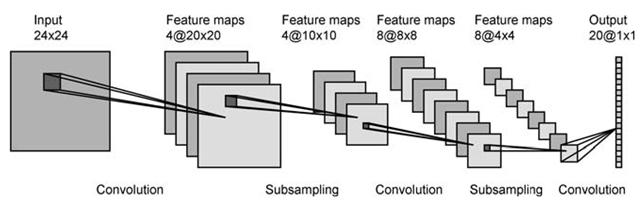

In [1]:
itorch.image('./ConvolutionalNeuralNetwork/CNN.png')

# Convolution

As you can see above, CNN mainly features what we call 'filters' and convolves it around the entire image.

By every step of convolution, a particular feature is calculated, and this will eventually form a spacial map, which we call 'feature maps'.

The convolution steps are as below

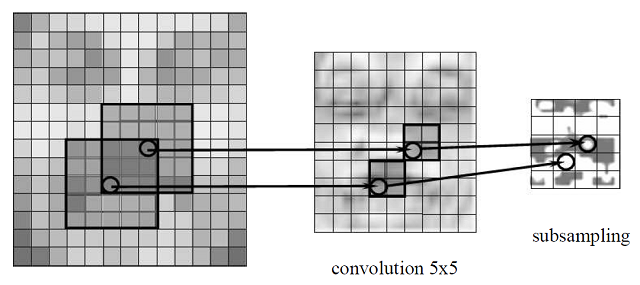

In [2]:
itorch.image('./ConvolutionalNeuralNetwork/convolution.png')

# MNIST dataset

We will first train the mnist dataset. It will contain 60000 training dataset and 10000 test dataset.

First, prepare the dataset by importing the essential libraries.

In [3]:
require 'torch'
require 'nn'
require 'optim'
mnist = require 'mnist'

In [4]:
print '============================================='
print '=> Loading MNIST dataset...'
print '============================================='

trainData = mnist.traindataset()
testData = mnist.testdataset()

=> Loading MNIST dataset...	


# Validation Dataset

For evaluating accuracy on the validation dataset.

Validation dataset is needed to check if whether the training is being successful and also checking if there is no overfitting or underfitting taking place.

Simple sign of overfitting is training loss being much lesser than the validation loss, while sign of underfitting will be training loss not decreasing from a certain point.

In [5]:
trainset = {
    size = 50000,
    data = trainData.data[{{1,50000}}],
    label = trainData.label[{{1,50000}}]
}

validData = {
    size = 10000,
    data = trainData.data[{{50001,60000}}],
    label = trainData.label[{{50001,60000}}]
}

trainData = trainset

In [6]:
-- checking out
print '============================================='
print("=> Checking Data...")
print '=============================================\n'
print("Training Set : ")
print(trainData)
print("Training Label : ")
print(trainData.label:size())
print("Validation Set : ")
print(validData)
print("Validation Label : ")
print(validData.label:size())
print("Test Set : ")
print(testData)
print("Test Label : ")
print(testData.label:size())

=> Checking Data...	
	
Training Set : 	
{
  data : ByteTensor - size: 50000x28x28
  size : 50000
  label : ByteTensor - size: 50000
}
Training Label : 	
 50000
[torch.LongStorage of size 1]

Validation Set : 	
{
  data : ByteTensor - size: 10000x28x28
  size : 10000
  label : ByteTensor - size: 10000
}
Validation Label : 	
 10000
[torch.LongStorage of size 1]

Test Set : 	
{
  data : ByteTensor - size: 10000x28x28
  size : 10000
  label : ByteTensor - size: 10000
}
Test Label : 	
 10000
[torch.LongStorage of size 1]



=> Visualizing Data...	
	
Training data : 	


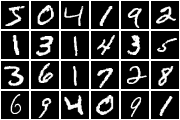

Test data : 	


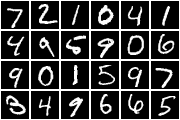

In [7]:
print '============================================='
print('=> Visualizing Data...')
print '=============================================\n'

if itorch then
    print('Training data : ')
    itorch.image(trainData.data[{ {1,24} }])
    print('Test data : ')
    itorch.image(testData.data[{ {1,24} }])
end

# Model definition

We will use a model with each Convolution layers, Batch Normalization, Activation function, Max pooling, and will add a single softmax layer on the output.

As an input, we will now load the (28, 28) image without any spreading or augmentation.

In this session, we will cover up all the basic nodules in the model.

## 1. Convolution Layers

Convolution simply means mathematically integrating the same region over and over.

As same as ordinary Neural Networks, they are made up of neurons that have trainable weights and biases.

Convolutional Neural Networks take advantage of the fact that the input cosists of images and they constrain the architecture in a more sensible way.

In particular, unlike a regular Neural Network, the weights of CNN are arranged in 3 dimensions:depth, height, width as described below.

The neurons in a lyaer will only be connected to a small region of the layer before it, instead of all of the neurons in a fully-connected manner.

This will drastically cause reduction in model complexity, thus preventing overfitting in a very significant scale.

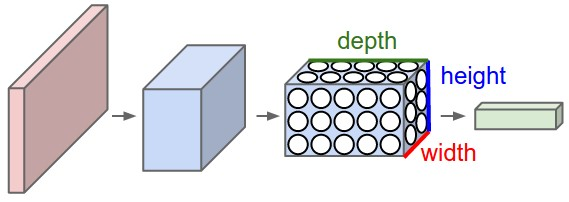

In [3]:
itorch.image('./ConvolutionalNeuralNetwork/cnn.jpeg')

## 2. Activation Function

### 1) Sigmoid

Sigmoid is the most basic non-linear activation function. However, mainly 2 problems exist.

The first one is that the function is not zero-cenetered,

while the second one being the infamous 'Gradient Vanishing Problem'.

### * Gradient Vanishing Problem

The Gradient Vanishing problem occurs due to the different gradients at each point of the sigmoid function.

As you can see in the below, for the points near 0, the gradient(the slope) is very distinguishable, making the gradient a meaningful value.

However, as the input diverges toward the end of the function, the gradient gradually becomes 0 and thus, results in not updating anything even if important signals occur.

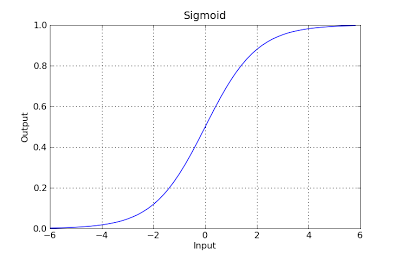

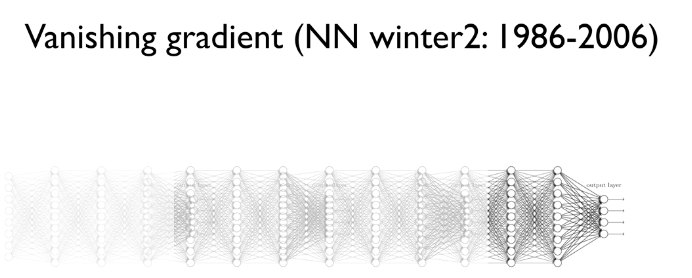

In [33]:
itorch.image('./ConvolutionalNeuralNetwork/sigmoid.png')
itorch.image('./ConvolutionalNeuralNetwork/vanish.png')

### 2) Hyperbolic Tanget (tanh)

The Tanh activation function arrised to address problems that occured due to sigmoid function not being non-zero centered.

However, the Gradient Vanishing Problem still seems to remain as a serious issue.

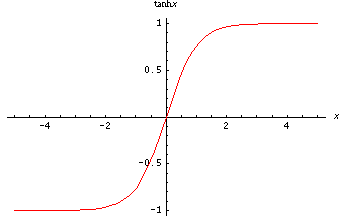

In [31]:
itorch.image('./ConvolutionalNeuralNetwork/tanh.png')

### 3) ReLU

ReLU appeared to be the solution for the Gradient Vanishing problems.

No matter how high the signal appears to be, the gradient always remains as 0.

However, it has its own problem that it completely ignores all the negative signals

and thus, as the layer gets deeper it gets harder and harder for the gradient to survive.

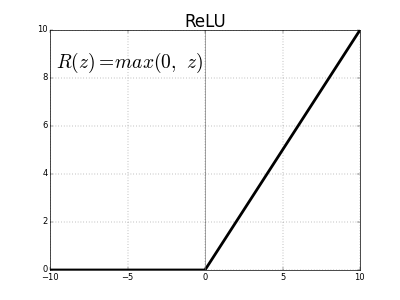

In [32]:
itorch.image('./ConvolutionalNeuralNetwork/relu.png')

### 4) Others

There are many other options such as Leaky-ReLU, randomized-Leaky-ReLU, p-ReLU, and etc.

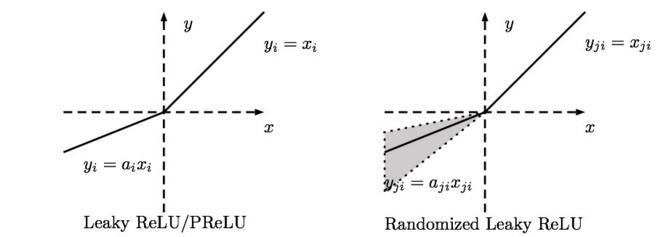

In [18]:
itorch.image('./ConvolutionalNeuralNetwork/LeakyReLU.jpeg')

In [8]:
-- Layer definition
input_channel = 1
filter_num_1 = 6
filter_num_2 = 12
fully_connected_layer = 100

-- convolution options
filter_size = 5
conv_stride = 1
padding_size = math.floor(filter_size/2) -- zero padding

-- max pooling options
pooling_size = 3
pooling_stride = 2
pooling_padding = math.floor(pooling_size/2)

-- Model definition

-- Conv block #1
model = nn.Sequential()
model:add(nn.SpatialConvolution(
        input_channel,
        filter_num_1,
        filter_size,
        filter_size,
        conv_stride,
        conv_stride,
        padding_size,
        padding_size
    )) -- Current spatial size = (28x28)
model:add(nn.ReLU())
model:add(nn.SpatialMaxPooling(
        pooling_size,
        pooling_size,
        pooling_stride,
        pooling_stride,
        pooling_padding,
        pooling_padding
    )) -- Current spatial size = (14x14)

-- Conv block #2
model:add(nn.SpatialConvolution(
        filter_num_1,
        filter_num_2,
        filter_size,
        filter_size,
        conv_stride,
        conv_stride,
        padding_size,
        padding_size
    )) -- Current spatial size = (14x14)
model:add(nn.ReLU())
model:add(nn.SpatialMaxPooling(
        pooling_size,
        pooling_size,
        pooling_stride,
        pooling_stride,
        pooling_padding,
        pooling_padding
    )) -- Current spatial size = (7x7)

-- Fully connected layer
model:add(nn.View(7*7*filter_num_2))
model:add(nn.Linear(7*7*filter_num_2, fully_connected_layer))
model:add(nn.ReLU())
model:add(nn.Linear(fully_connected_layer, 10))
model:add(nn.LogSoftMax()) -- only for NLL Criterion

# Criterion definition

Torch provides various criterions enabling the user to train various models with various methods.

In this section, we will use the ClassNLLCriterion as before.

In the next session with CIFAR-10, we will also cover up the necessary criterions provided by Torch. 

In [9]:
criterion = nn.ClassNLLCriterion()
-- criterion = nn.CrossEntropyCriterion()

# GPU function

The below codes enables the model to train on the GPU you own.

You must have already completed the GPU settings in order to 

train by this option.

You can upload the model into GPU by simply adding ':cuda()' on your code.

If you're willing to train only using your CPU environment, just add ':double()' or ':float()' on your code.

In [10]:
require 'cutorch'
require 'cudnn'
require 'cunn'

GPU_flag = true

if GPU_flag then
    model:cuda()
    criterion:cuda()
else
    model:double()
    criterion:double()
end

# Optimizer Definition

There are various descent algorithms other than SGD(Stochastic Gradient Descent), but we will continue to use SGD as our default optimizer.

In [11]:
sgd_params = {
   learningRate = 1e-3,
   learningRateDecay = 1e-5,
   weightDecay = 5e-4,
   momentum = 0.9
}

In [12]:
x, dl_dx = model:getParameters()

# Mini-batch SGD

In contrast to the chapters before, from now on we're going to adapt mini-batch SGD.

Gradient Descent performs best when it's batch equals it's training size, but for many reasons and for many cases, that simply isn't possible.

So, as a median offer for Gradient Descent(Batch size = training size) and Stochastic Gradient Descent(Batch size = 1), mini-batch SGD takes a fixed amount of batches into its input.

It results in much faster and much efficient training than Stochastic Gradient Descent, with consuming much less memory than Full-batch Gradient Descent.

In [13]:
-- Mini-batch SGD function
mini_batch_upload = function(GPU_flag, batch_size)
    local current_loss = 0
    local count = 0
    local shuffle = torch.randperm(trainData.size)
    batch_size = batch_size or 128
    
    for t = 1,trainData.size,batch_size do
        -- setup inputs and targets for this mini-batch
        local size = math.min(t + batch_size - 1, trainData.size) - t
        if GPU_flag then
            inputs = torch.Tensor(size, 28, 28):cuda()
        else
            inputs = torch.Tensor(size, 28, 28)
        end
        
        -- definition of target data
        local targets = torch.Tensor(size)
        
        -- Batch iteration
        for i = 1,size do
            local input = trainData.data[shuffle[i+t]]
            if GPU_flag then
                input:cuda()
            end
            local target = trainData.label[shuffle[i+t]]
            -- if target == 0 then target = 10 end
            inputs[i] = input
            targets[i] = target
        end
        targets:add(1)
        
        local feval = function(x_new)
            -- reset data
            if x ~= x_new then x:copy(x_new) end
            dl_dx:zero()

            -- perform mini-batch gradient descent
            size = inputs:size()
            inputs:resize(size[1], 1, size[2], size[3])
            local loss = criterion:forward(model:forward(inputs), targets)
            model:backward(inputs, criterion:backward(model.output, targets))

            return loss, dl_dx
        end
        
        _, fs = optim.sgd(feval, x, sgd_params)
        -- fs is a table containing value of the loss function
        -- (just 1 value for the SGD optimization)
        count = count + 1
        current_loss = current_loss + fs[1]
    end

    -- normalize loss
    return current_loss / count
end

# Evaluating Dataset

Below will be the code for evaluating validation / test dataset accuracy

In [14]:
eval = function(dataset, GPU_flag, batch_size)
    local count = 0
    batch_size = batch_size or 128
    
    for i = 1,dataset.size,batch_size do
        local size = math.min(i + batch_size - 1, dataset.size) - i
        -- Important
        -- The arguement set only accepts Double Tensor as an input!
        if GPU_flag then
            inputs = dataset.data[{{i,i+size-1}}]:cuda()
        else
            inputs = dataset.data[{{i,i+size-1}}]:double()
        end
        
        -- definition of target label
        if GPU_flag then 
            local tmp = dataset.label[{{i,i+size-1}}]:long()
            targets = torch.CudaLongTensor()
            targets:resize(tmp:size()):copy(tmp)
        else
            targets = dataset.label[{{i,i+size-1}}]:long()
        end
        
        -- feed forward neural network
        size = inputs:size()
        inputs:resize(size[1], 1, size[2], size[3])
        local outputs = model:forward(inputs)
        local _, indices = torch.max(outputs, 2)
        indices:add(-1)
        local guessed_right = indices:eq(targets):sum()
        count = count + guessed_right
    end

    return count / dataset.size
end

# Training the model

Now on, we will start to train the model.

The training will be proceeded through 10 epochs, and will be trained with the parameters defined above (See 'sgd_params')

In [15]:
local epochs = 10
local last_accurcay = 0
model:zeroGradParameters() -- initialize gradient buffers in the network to 0

for i = 1,epochs do
    local loss = mini_batch_upload(GPU_flag)
    print(string.format('Epoch #%d : Loss = %4f', i, loss))
    local accuracy = eval(validData, GPU_flag)
    print(string.format('Validation accuracy : %4f', accuracy*100)..'%')
    last_accuracy = accuracy
end

print("\n\nTraining Progress Finished!")
print(string.format('Final Test acc : %4f', last_accuracy*100)..'%')

Epoch #1 : Loss = 2.142035	


Validation accuracy : 80.760000%	


Epoch #2 : Loss = 0.389163	


Validation accuracy : 92.220000%	


Epoch #3 : Loss = 0.228814	


Validation accuracy : 93.970000%	


Epoch #4 : Loss = 0.183504	


Validation accuracy : 94.670000%	


Epoch #5 : Loss = 0.158508	


Validation accuracy : 95.410000%	


Epoch #6 : Loss = 0.140793	


Validation accuracy : 95.570000%	


Epoch #7 : Loss = 0.126785	


Validation accuracy : 95.530000%	


Epoch #8 : Loss = 0.116110	


Validation accuracy : 95.990000%	


Epoch #9 : Loss = 0.107768	


Validation accuracy : 96.060000%	


Epoch #10 : Loss = 0.099638	


Validation accuracy : 96.400000%	


Training Progress Finished!	
Final Test acc : 96.400000%	


# Saving the model

Now we have successfully trained the model, we will now save the model into a '.t7' data format.

Simply just run the code below.

In [16]:
torch.save('./mnist.t7', model)

# Loading the model

After you saved your model, try to upload the weights back into your model.

Run the code below and test if the test accuracy appears same as the above.

The model will be saved in the same directory with the name 'bestmodel.t7'.

In [17]:
model = torch.load('./mnist.t7')

In [18]:
print("Loaded Test Accuracy : "..(eval(testData, GPU_flag)*100)..'%')

Loaded Test Accuracy : 96.34%	
